In [1]:
import librosa
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Libosa load

In [2]:
y, sr = librosa.load("/content/drive/MyDrive/python_scratch/audio/Hungarian_Dance_number_5_-_Allegro_in_F_sharp_minor_(string_orchestra).ogg")

# Audio Waveform
To see the content of `y` we need to plot it. We'll use matplotlib for that

In [3]:
print(len(y), sr)
duration_in_seconds = len(y) / sr
# 1 second  ----- 22050 samples
#           ----- 1010880 samples
print(duration_in_seconds)

1010880 22050
45.844897959183676


In [4]:
import matplotlib.pyplot as plt

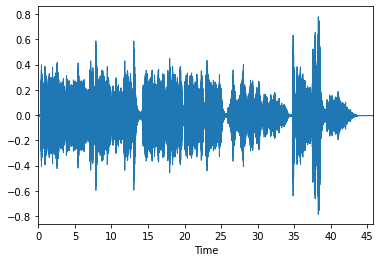

In [5]:
# print(y[:10])
# plt.plot(y)
# plt.plot(y[len(y)//2:len(y)//2+1024]) plot a section of the file
# alternatively, we can use librosa's display, very similar
import librosa.display
librosa.display.waveplot(y)

# Spectrogram of a sound

A [spectrogram](https://en.wikipedia.org/wiki/Spectrogram) is a visual representation of the spectrum of frequencies of a signal as it varies with time. 

In a spectrogram, **time** is in the *X-axis* and **frequencies** in the *Y-axis*

## Frequency Spectrum
This is the first step to get to the spectrogram: compute the Discrete Fourier Transform (DFT) on the audio signal so as to decompose the signal into its sine and cosine components (aka, frequencies). However, we compute this DFT in *shorter length windows*, and thus we call it Short Time Fourier Transform (STFT), and we use librosa's `stft` function. NOTE: what is returned from librosa is the frequency spectrum in complex values, that is, real and imaginary value pairs... The real values are useful for us, since they are the Amplitudes of the frequencies

In [6]:
# Take the Short time Fourier Transform
D = librosa.stft(y)
# D is now an array of REAL and IMAGINARY values, ie, a spectrum of frequencies

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


 ...]

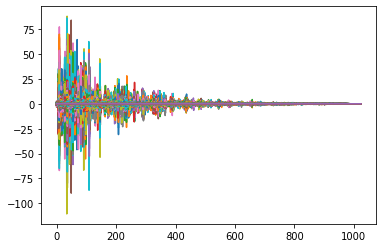

In [7]:
# Can we plot this?

# This is what it looks like SPOILER: this is not useful, we'll see why
plt.plot(D)

## Magnitude (aka Amplitude Spectrum)

To make sense of the output of STFT, one thing we can do is calculate the magnitude of the spectrum. This is achieved by computing the absolute value of every element within the spectrum



In [8]:
# One way to do this is by using numpy.absolute (aka, np.abs)
import numpy as np
magnitude = np.absolute(D)

In [9]:
# We can also calculate the magnitude using librosa's built in function,
# whith it also returns the 'phase' component of the spectrum... 
# we will ignore the phase here...
librosa_magnitude, phase = librosa.magphase(D)

 ...]

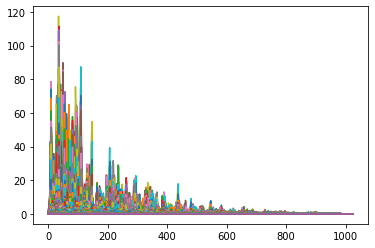

In [10]:
# Using 'magnitude' or 'librosa_magnitude', 
# Now, can can plot a spectrogram?
# 
# SPOILER: this will not be useful as well
plt.plot(magnitude)
# plt.plot(librosa_magnitude)

In [ ]:
a = [ 1, 2, 3, 4 ]
print(len(a))
print(a)
b = np.array(a)
print(b.shape)
print(b)
c = np.array([a, a])
print(c)
print(c.shape)

4
[1, 2, 3, 4]
(4,)
[1 2 3 4]
[[1 2 3 4]
 [1 2 3 4]]
(2, 4)


In [ ]:
# Take a look at the shape of these arrays:
print("Magnitude",magnitude.shape)
print("Librosa Magnitude",librosa_magnitude.shape)
print("Frequency Spectrum", D.shape)
print("Frequency Spectrum REAL part", D.real.shape)
print("Frequency Spectrum IMAGINARY part", D.imag.shape)

Magnitude (1025, 1975)
Librosa Magnitude (1025, 1975)
Frequency Spectrum (1025, 1975)
Frequency Spectrum REAL part (1025, 1975)
Frequency Spectrum IMAGINARY part (1025, 1975)


## Plotting a Spectrogram

### Power Spectrum... scaled in Decibels

In [11]:
# instead of plotting the magnitude (aka. amplitude), we plot the power spectrum
power_spectrum = magnitude ** 2
# aaaaand we scale it to a decibel scale
db_power_spectrum = librosa.power_to_db(power_spectrum)

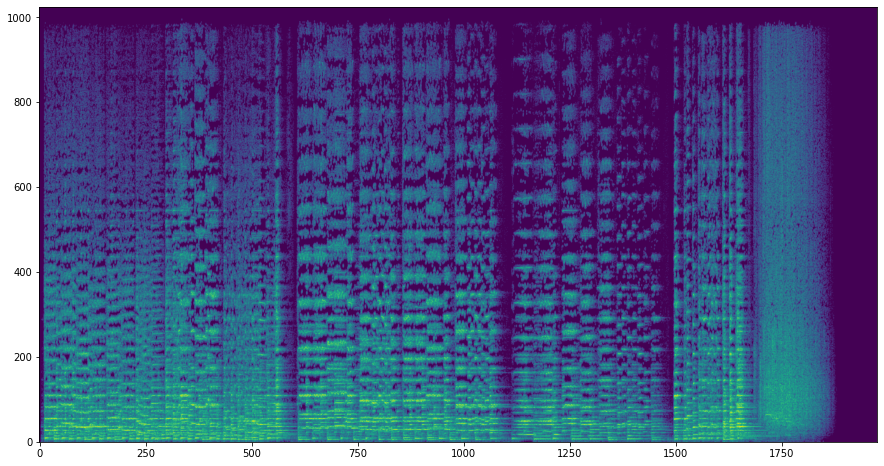

In [12]:
fig = plt.figure(figsize=(20,8)) # set the size of the figure
plt.imshow(db_power_spectrum, origin='lower') # 'lower' places the origin at the base of the figure

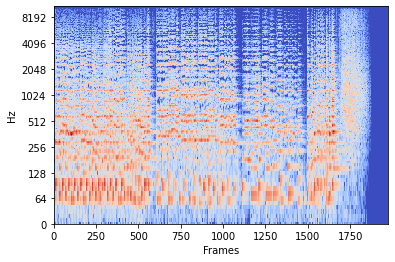

In [13]:
# Alternatively, we can use librosa's librosa.display.specplot, a bit nicer:

# librosa.display.specshow(magnitude, x_axis='frames', y_axis='linear')
# librosa.display.specshow(numpy_magnitude, x_axis='frames', y_axis='linear')
# librosa.display.specshow(power_spectrum, x_axis='frames', y_axis='linear')
# librosa.display.specshow(db_power_spectrum, x_axis='frames', y_axis='linear')
librosa.display.specshow(db_power_spectrum, x_axis='frames', y_axis='log')

# Exercise 1
Define a function to plot a spectrogram given only the audio file name

In [ ]:
def spectrogram(filename):
    # plot the spectrogram of a given filename

# Exercise 2
Get the spectrograms of 10 files of your choosing and compare them